# Pandas
## Python Data Analysis Library

In a previous session we explored NumPy in detail, learning about array structures and vectorisation. While NumPy is extremely powerful, it has some limitations. For example, data is organised into rows and columns (often in more than 2 dimensions) without labels other than indices. It is really hard to keep track of complex datasets by indexing and slicing alone - we need human-readable labels to make advanced queries and interpret complex results. This is where Pandas comes in - it is an invaluable tool for analysing labelled data. It takes data from csv, tsv, SQL or numerous other sources and converts it into a Python object ordered in rows and columns and persists the row and column labels, which can then be used to query the dataset.

Pandas should already be installed in your conda environment, so we can simply import using the convention:

In [1]:
import pandas as pd

## 1 DataFrames
### 1.1 DataFrame structure

The Pandas dataframe is a structure for storing data in 2D rectangular grids in which each column is a vector containing values for a particular variable. Within a row, there can be different types of data because the dtype is set column-wise and each column is a separate vector. A basic definition of a Pandas dataframe could be:

<b><i>A labelled 2D data structure where each column, but not necessarily each row, contains a single dtype</i></b>

Each value has an index, similarly to a NumPy array, but the Pandas dataframe also has named fields, meaning the data can be queried using names assigned by the user instead of keeping track of indices.

For example, let's instantiate a dataframe named DF with columns named A, B and C, and add some data.


In [2]:
import numpy as np

DF = pd.DataFrame(columns=['A','B','C'])

array1 = np.random.randint(100,size=100)
array2 = np.random.randint(100,size=100)
array3 = np.random.randint(100,size=100)

DF['A'] = array1
DF['B'] = array2
DF['C'] = array3


One important point that you may already have noticed is that the dataframe can accept NumPy arrays. In this case we have provided three 1D NumPy arrays, effectively providing three vectors to become three columns in the dataframe, but we could also have provided a single 2D array:

In [3]:
import numpy as np

array1 = np.random.randint(30,size=(10,3))
DF = pd.DataFrame(array1,columns=['A','B','C'])

Just like with NumPy arrays, we can query the shape and size of the dataframe to understand the data dimensionality...

In [4]:
print("DF shape = ", DF.shape)
print("DF size = ", DF.size)

DF shape =  (10, 3)
DF size =  30


We can peek at the structure of this dataframe using the head() function which reports the top 5 rows of the dataframe to the console. This is really useful for checking quickly, by eye, that the column order, column labels, and dataframe orientation are correct, and that the values are consistent, correctly positioned and within an expected range.

In [5]:
DF.head()

,A,B,C
0,8,21,12
1,19,4,4
2,12,13,28
3,29,9,24
4,27,18,6


We can also do the same for the final 5 rows in the dataframe using df.tail()

In [6]:
DF.tail()

,A,B,C
5,9,15,16
6,10,1,8
7,11,19,2
8,19,8,5
9,2,13,25


We can also quickly access summary info about the dataframe structure using the df.info() function.

In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
A    10 non-null int64
B    10 non-null int64
C    10 non-null int64
dtypes: int64(3)
memory usage: 368.0 bytes


We can access columns using square brackets, similarly to indexing into NumPy arrays, but parsing the column name instead of its position in the matrix. For example, lets extract column A to a new variable. We expect that this will provide us with a vector of integers with a length of 10:

In [8]:
A = DF['A']
print("Shape of A = ",A.shape)
print("dtype = ", A.dtype)
print()
A.head()

Shape of A =  (10,)
dtype =  int64



0     8
1    19
2    12
3    29
4    27
Name: A, dtype: int64

### 1.2 DataFrames from files
In the example above we provided a NumPy array as input to the Pandas dataframe. As a data scientist you will likely need to use data stored externally in files such as .csv or .tsv (comma separated or tab separated values) or perhaps files from Excel or an SQL, NoSQL or MongoDB database, or some other file type. To begin with we will look at csv files. I have downloaded a csv file from Kaggle for this exercise and made it available in the notebook working directory. (https://www.kaggle.com/carlolepelaars/toy-dataset/). The dataset has 6 columns showing population data for 150,000 residents of Dallas, USA. Since it is a dataframe of population data, we'll name it popDF.

In [9]:
popDF = pd.read_csv('./toy_dataset.csv')
print("Population dataframe has {} columns and {} rows ".format(popDF.shape[1],popDF.shape[0]))
popDF.head()

Population dataframe has 6 columns and 150000 rows 


,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


Rows and columns in Pandas datasets are often referred to differently, especially in the context of machine learning and data modelling. Columns are data "features" while the rows are "instances" of the features.

## 2 Exploratory Data Analysis

Pandas is an excellent tool for exploring a dataset because the dataframe structure promotes complex querying and there are many built in functions for exploration and visualization. 

### 2.1 df.describe()

The data contained within the dataframe can be summarised using the pandas function describe(). This provides summary statistics for each column, including the number of rows (count), the mean, standard deviation, min and interquartile range of the values in that column. Notice that only the columns containing numeric data are included.

In [10]:
popDF.describe()

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


Notice that popDF.describe() only returned a summary of those columns containing numeric data. We can force the method to summarise other data types using the "include" keyword argument. In this case, where the operations are only achievable for numeric data types, a NaN is returned. Similarly, some new rows are added that provide summary values for non-numeric data and columns containing numeric dtypes simply return NaNs. These new columns show the number of unique entries in the column ("unique"), the most commonly occurring value ("top") and that top value's frequency of occurrence ("freq").

In [11]:
popDF.describe(include=['object', 'float', 'int'])

,Number,City,Gender,Age,Income,Illness
count,150000.000000,150000,150000,150000.000000,150000.000000,150000
unique,NaN,8,2,NaN,NaN,2
top,NaN,New York City,Male,NaN,NaN,No
freq,NaN,50307,83800,NaN,NaN,137861
mean,75000.500000,NaN,NaN,44.950200,91252.798273,NaN
std,43301.414527,NaN,NaN,11.572486,24989.500948,NaN
min,1.000000,NaN,NaN,25.000000,-654.000000,NaN
25%,37500.750000,NaN,NaN,35.000000,80867.750000,NaN
50%,75000.500000,NaN,NaN,45.000000,93655.000000,NaN
75%,112500.250000,NaN,NaN,55.000000,104519.000000,NaN


We can also constrain the describe() method to a single column or a set of columns

In [12]:
popDF['Age'].describe() #describe only the Age column

count    150000.000000
mean         44.950200
std          11.572486
min          25.000000
25%          35.000000
50%          45.000000
75%          55.000000
max          65.000000
Name: Age, dtype: float64

In [13]:
popDF[['Age','Income']].describe()

,Age,Income
count,150000.000000,150000.000000
mean,44.950200,91252.798273
std,11.572486,24989.500948
min,25.000000,-654.000000
25%,35.000000,80867.750000
50%,45.000000,93655.000000
75%,55.000000,104519.000000
max,65.000000,177157.000000


### 2.2 More info

The structural information about the dataframe is accessible using df.info()

In [14]:
popDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
Number     150000 non-null int64
City       150000 non-null object
Gender     150000 non-null object
Age        150000 non-null int64
Income     150000 non-null float64
Illness    150000 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


For the non numeric dtypes, we can query the frequency of each unique value in the dataframe using value_counts(), for example, how many instances are there for each city?

In [15]:
popDF['City'].value_counts()

New York City      50307
Los Angeles        32173
Dallas             19707
Mountain View      14219
Austin             12292
Boston              8301
Washington D.C.     8120
San Diego           4881
Name: City, dtype: int64

We can also report these data as proportions of the total rather than absolute count values...

In [16]:
popDF['City'].value_counts(normalize=True)

New York City      0.335380
Los Angeles        0.214487
Dallas             0.131380
Mountain View      0.094793
Austin             0.081947
Boston             0.055340
Washington D.C.    0.054133
San Diego          0.032540
Name: City, dtype: float64

### 2.3 Sorting and reformatting

We can sort the data using the built-in sort function. By default the data is sorted into ascending order (smallest first), to sort into descending order (largest first) we can set the argument ascending = True.

In [17]:
# sort values by income, in descending order, and display the top 5 rows
popDF.sort_values(by='Income', ascending=False).head()

,Number,City,Gender,Age,Income,Illness
109350,109351,Mountain View,Male,58,177157.0,No
105281,105282,Mountain View,Male,41,176746.0,No
109060,109061,Mountain View,Male,61,173991.0,No
110877,110878,Mountain View,Male,52,173826.0,No
112192,112193,Mountain View,Male,58,172825.0,No


Sorting by multiple columns is also possible. For example, sorting by income (descending) and age (ascending) results in a dataset where the youngest, richest instance is at the top of the dataframe. The algorithm will osrt by income first, then sort rows with matching income by the age. Therefore, the result of sorting by both columns will be identical to sorting only by income *unless* there are rows with identical income values.

In [18]:
popDF.sort_values(by=['Income', 'Age'],
        ascending=[False, True]).head()

,Number,City,Gender,Age,Income,Illness
109350,109351,Mountain View,Male,58,177157.0,No
105281,105282,Mountain View,Male,41,176746.0,No
109060,109061,Mountain View,Male,61,173991.0,No
110877,110878,Mountain View,Male,52,173826.0,No
112192,112193,Mountain View,Male,58,172825.0,No


We can further demonstrate this by using a non-numeric dtype as one of the sort criteria. For example, if we sort by City first, then income, we will get a dataframe with the residents of each city (alphabetical order) ordered by their income.

In [19]:
popDF.sort_values(by=['City', 'Income'],
        ascending=[True, False]).head()

,Number,City,Gender,Age,Income,Illness
148778,148779,Austin,Male,42,132302.0,No
147381,147382,Austin,Male,56,131829.0,No
143267,143268,Austin,Male,64,129821.0,No
139728,139729,Austin,Male,53,128569.0,No
138478,138479,Austin,Male,51,127200.0,Yes


It can sometimes be useful to change the dtype of a particular column. We can do this using the built-in .astype() function.

In [20]:
popDF['Number'] = popDF['Number'].astype('float64')   # change Number column to float64
popDF['Number'].describe()  # check result

count    150000.000000
mean      75000.500000
std       43301.414527
min           1.000000
25%       37500.750000
50%       75000.500000
75%      112500.250000
max      150000.000000
Name: Number, dtype: float64

## 3 Indexing and Multi-indexing

### 3.1 Indexing

There are several options for indexing data in Pandas. While NumPy only allows numerical indexing using the column and row numbers, Pandas allows data to be selected using row and column labels. Label-based indexing of columns can be achieved simply by passing a column label in square brackets:

In [21]:

# This will grab the column "City" from popDF and assign it to the variable "CityColumn"

CityColumn = popDF['City']

In [22]:
CityColumn.head()

0    Dallas
1    Dallas
2    Dallas
3    Dallas
4    Dallas
Name: City, dtype: object

The syntax is the same for multiple columns:

In [23]:

# This will grab the "City" and "Gender" columns and assign them both to the variable "CityAndGenderColumns"

CityAndGenderColumns = popDF[['City','Gender']]

In [24]:
CityAndGenderColumns.head()

,City,Gender
0,Dallas,Male
1,Dallas,Male
2,Dallas,Male
3,Dallas,Male
4,Dallas,Male


### 3.1.1 df.loc[ ]

The .loc[] function exists for extracting rows from a DataFrame using index labels. Our DataFrame currently has integer indexes (0,1,2,3) so here we can create a small example DataFrame using just the first five rows from popDF and replace the index labels with text labels.

In [25]:
# first grab the first 5 rows of popDF and assign the small DataFrame to variable "smallDF"
smallDF = popDF.head()

# replace the integer indexes in smallDF with text labels
smallDF.index=['one','two','three','four','five']

Now we have an example DataFrame with each row indexed with a text label. We can now demonstrate the .loc[] function for selecting data by text labels. We pass the row label to .loc[] and the result is the values of all columns in the DataFrame for the selected row:

In [26]:
# select row three

smallDF.loc['three']

Number          3
City       Dallas
Gender       Male
Age            42
Income      52483
Illness        No
Name: three, dtype: object

This can also be applied to selecting multiple rows:

In [27]:
# select rows one and three

smallDF.loc[['one','three']]

,Number,City,Gender,Age,Income,Illness
one,1.0,Dallas,Male,41,40367.0,No
three,3.0,Dallas,Male,42,52483.0,No


or it can be applied to selecting ranges of rows. For example, let's select all rows between two named rows.

In [28]:
# select roIndexingws between one and three

smallDF.loc['one':'three']

,Number,City,Gender,Age,Income,Illness
one,1.0,Dallas,Male,41,40367.0,No
two,2.0,Dallas,Male,54,45084.0,No
three,3.0,Dallas,Male,42,52483.0,No


It is also valid to pass a condition that creates a Boolean array to .loc[]. For example, the statement popDF.loc['Gender']==''Female' returns a Boolean array where those rows where 'Female' exists in the 'Gender' column contain 'True' and the others contain 'False'. The rows containing 'True' are selected.

In [29]:
# Select rows where Age is equal to 41

smallDF.loc[smallDF['Age']==41]

,Number,City,Gender,Age,Income,Illness
one,1.0,Dallas,Male,41,40367.0,No


Specific row values in certain columns can be selected by adding arguments to .loc[]. In the example below we extract the City and Gender values ony for rows where the Age is equal to 41.

In [30]:
smallDF.loc[smallDF['Age']==41,['City','Gender']]

,City,Gender
one,Dallas,Male


### 3.1.2 df.iloc[ ]

An alternative to .loc[] is .iloc[]. This is used for indexing by integer values instead of text labels, replicating the numerical indexing syntax from NumPy. To demonstrate we can switch back to using popDF.


In [31]:
# select first row from dataframe

popDF.iloc[0]

Number          1
City       Dallas
Gender       Male
Age            41
Income      40367
Illness        No
Name: 0, dtype: object

In [32]:
# select rows 10 to 15 from dataframe

popDF[10:15]

,Number,City,Gender,Age,Income,Illness
10,11.0,Dallas,Female,48,41524.0,Yes
11,12.0,Dallas,Male,47,54777.0,No
12,13.0,Dallas,Male,46,62749.0,No
13,14.0,Dallas,Female,42,50894.0,No
14,15.0,Dallas,Female,61,38429.0,No


In [33]:
# select fifth to tenth rows from Age column (4th column)

popDF.iloc[5:11,3]

5     36
6     32
7     39
8     51
9     30
10    48
Name: Age, dtype: int64

In [34]:
# select fifth to tenth rows from Gender, Age and Income columns

popDF.iloc[5:11,[2,3,4]]

,Gender,Age,Income
5,Female,36,50786.0
6,Female,32,33155.0
7,Male,39,30914.0
8,Male,51,68667.0
9,Female,30,50082.0
10,Female,48,41524.0


There are some interesting potential gotchas to consider with .loc[]. You may have noticed in the previous cells that when a single row is selected it is displayed differently (a vertical arrangement of plain text) compared to multiple rows (a neatly presented and formatted as a table). This is because when only one row is selected .iloc[] returns a Pandas Series object. To maintain the DataFrame type, .iloc[] requires a single valued list to be passed.

In [96]:
#print the type of the object returned by .iloc[] when a row value is passed

print(type(popDF.iloc[500]))

popDF.iloc[500]

<class 'pandas.core.series.Series'>


Number        501
City       Dallas
Gender       Male
Age            50
Income      51169
Illness        No
Name: 500, dtype: object

In [95]:
# print the type of the object returned by .iloc[] when a single-valued list is passed

print(type(popDF.iloc[[500]]))

popDF.iloc[[500]]

<class 'pandas.core.frame.DataFrame'>


,Number,City,Gender,Age,Income,Illness
500,501.0,Dallas,Male,50,51169.0,No


### 3.2 Heirarchical indexing/ Multi-indexing


Heirarchical indexing is the method used by Pandas to represent multidimensional data. Note that for most purposes, data with >2 dimensions is better analysed using the Python package "xarray". However, multi-indexing enables Pandas to force multidimensional data into a two-dimensional structure. This allows that data to be analysed in Pandas. The concept underpinning multi-indexing is the ability to represent n-dimensional data in lower dimensional Series and DataFrame structures. 

Our population dataset fits nicely into a two dimensional structure with rows and columns, but what about if we wanted to capture changes in the same variables over time? In this case, we need to label each element with a date as well as a row and column index. Each element therefore has a position in three dimensions - row, column and a third 'time' dimension. Multi-indexing allows this to be captured without breaking the two-dimensionality of the Pandas DataFrame.

In the following example, we consider the populations of the cities included in our popDF DataFrame in two succesive years - 2019 and 2020. To achieve this, we first define an index. We want to be able to index the data by both the city name and the year, so that we can extract Los Angeles in 2019, for example. 

I have made up the population values below. They are assembled into a Pandas DataFrame and the index is a list of tuples detailing the city name and year.

In [98]:
# Define the values to be used as indexes - this should be a list of tuples where each tuple contains the
# city name and year

index = [('Dallas', 2019), ('Dallas', 2020), ('New York City', 2019), ('New York City',2020),
         ('Los Angeles', 2019),('Los Angeles', 2020), ('Mountain View', 2019),('Mountain View', 2020),
         ('Boston', 2019), ('Boston', 2020), ('Washington D.C.', 2019), ('Washington D.C.', 2020), 
         ('San Diego',2019), ('San Diego', 2020), ('Austin',2019), ('Austin', 2020)]

# define the populations of each city in each year (the order must be consistent with the tuples in index)

population = [32423452, 35554326, 45456751, 44123454, 55090987,56789033, 18976457, 19378102, 20851820,
              25145561, 65453674, 65380987, 34545643, 34876758, 4563355, 47649094]

# create a Pandas MultiIndex object from the list of tuples
index = pd.MultiIndex.from_tuples(index)

# create a DataFrame with the populations as the data and the MultiIndex object 'index' as the index
multiDF = pd.DataFrame(population,index=index)

# rename the column
multiDF.columns=['population']

If we display the content of the new multi-indexed dataframe we can see that each "city" index label has associated with it two "year" indexes.

In [100]:
# display the contents of the multi-indexed dataframe

multiDF

population
Dallas          2019    32423452
                2020    35554326
New York City   2019    45456751
                2020    44123454
Los Angeles     2019    55090987
                2020    56789033
Mountain View   2019    18976457
                2020    19378102
Boston          2019    20851820
                2020    25145561
Washington D.C. 2019    65453674
                2020    65380987
San Diego       2019    34545643
                2020    34876758
Austin          2019     4563355
                2020    47649094

With this structure we can simply index into the multi-indexed DataFrame using the normal .loc syntax, for example let's extract the population for Dallas in 2019...

In [101]:
multiDF.loc['Dallas',2019]

population    32423452
Name: (Dallas, 2019), dtype: int64

or all of the population data for Dallas:

In [102]:
multiDF.loc['Dallas',:]

,population
2019,32423452
2020,35554326


or the population data for all cities in 2020...

In [104]:
multiDF['population'].loc[:,2020]

Dallas             35554326
New York City      44123454
Los Angeles        56789033
Mountain View      19378102
Boston             25145561
Washington D.C.    65380987
San Diego          34876758
Austin             47649094
Name: population, dtype: int64

We can also reformat this into a more intuitive two dimensional representation with two sub-columns beneath population, one for each year. This is achieved by 'unstacking' the dataframe using df.unstack()...

In [105]:
multiDF.unstack()

population          
                      2019      2020
Austin             4563355  47649094
Boston            20851820  25145561
Dallas            32423452  35554326
Los Angeles       55090987  56789033
Mountain View     18976457  19378102
New York City     45456751  44123454
San Diego         34545643  34876758
Washington D.C.   65453674  65380987

It is also possible to specify which level to unstack, for example, unstacking the first index (City) creates a two dimensional structure with separate columns for each city, with the years remaining as row indexes:

In [106]:
multiDF.unstack(level=0)

population                                                              \
         Austin    Boston    Dallas Los Angeles Mountain View New York City   
2019    4563355  20851820  32423452    55090987      18976457      45456751   
2020   47649094  25145561  35554326    56789033      19378102      44123454   

                                
     San Diego Washington D.C.  
2019  34545643        65453674  
2020  34876758        65380987

Alternatively, we could unstack the second index, giving columns for years. This is what occurred by default when we did not specify a level to unstack.

In [107]:
multiDF.unstack(level=[1])

population          
                      2019      2020
Austin             4563355  47649094
Boston            20851820  25145561
Dallas            32423452  35554326
Los Angeles       55090987  56789033
Mountain View     18976457  19378102
New York City     45456751  44123454
San Diego         34545643  34876758
Washington D.C.   65453674  65380987

We can also completely unstack the dataframe by specifying both levels. In this case, the structure returned is a Pandas Series object. This makes sense because each unstack effectively removes a dimension from the structure - a multi-indexed dataframe with two indexes (which can be conceptualized as a three dimensional structure) is reduced to a flat two-dimensional dataframe when it is unstacked on one level. Unstacking another dimension effectively removes the indexes, reorganising the data into one dimensional lists.

In [108]:
multiDF.unstack(level=[0,1])

population  Dallas           2019    32423452
                             2020    35554326
            New York City    2019    45456751
                             2020    44123454
            Los Angeles      2019    55090987
                             2020    56789033
            Mountain View    2019    18976457
                             2020    19378102
            Boston           2019    20851820
                             2020    25145561
            Washington D.C.  2019    65453674
                             2020    65380987
            San Diego        2019    34545643
                             2020    34876758
            Austin           2019     4563355
                             2020    47649094
dtype: int64

It is important to note that some multi-indexing slicing methods will fail if the indexes are not sorted, so the pd.sort_index() function cna be used to ensure the indexes are sorted into numerical or alphabetical order:

In [109]:
multiDF = multiDF.sort_index()

In [110]:
multiDF

population
Austin          2019     4563355
                2020    47649094
Boston          2019    20851820
                2020    25145561
Dallas          2019    32423452
                2020    35554326
Los Angeles     2019    55090987
                2020    56789033
Mountain View   2019    18976457
                2020    19378102
New York City   2019    45456751
                2020    44123454
San Diego       2019    34545643
                2020    34876758
Washington D.C. 2019    65453674
                2020    65380987

We can also apply operations over specific levels in a multi-indexed DataFrame. For example, perhaps we want to know the mean population in each city over all available years. In this case, we specify that the df.mean() function should operate over the first level.

In [111]:
multiDF.mean(level=0)

,population
Austin,26106224.5
Boston,22998690.5
Dallas,33988889.0
Los Angeles,55940010.0
Mountain View,19177279.5
New York City,44790102.5
San Diego,34711200.5
Washington D.C.,65417330.5


In [112]:
multiDF.mean(level=1)

,population
2019,3.467027e+07
2020,4.111216e+07


## 4 Visualising Data

There are many ways to visualise data from Pandas using external plotting libraries such as matplotlib and seaborn, but there are also powerful visualisation functions built-in to Pandas. These are built on top of Matplotlib but are accessible via the Pandas API.

There are many plot types available in Pandas that are all accessed using very similar syntax. For example, there is a very useful built-in method for plotting histograms of data elements, using df.hist(). In the example below we plot histograms for Age and Income from the popDF DataFrame. Automatically, only those columns that have numeric data types are included, but in the example below I limit it to Age and Income.

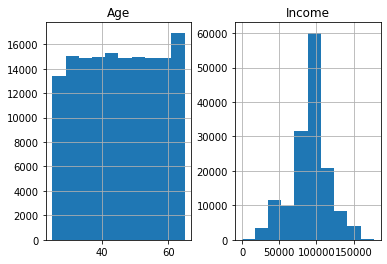

In [113]:
# plot histogram using df.hist()

histogram = popDF[['Age','Income']].hist()

The histogram above was created using the .hist() function, but there is another more general route to achieving the same plot. This is to use the df.plot() function and pass kind = 'hist' as a keyword argument. The major difference between these two options is that the former allows the user to call .hist() once with multiple data elements and Pandas automatically produces a multi-panel plot with separate axes for each histogram. Using df.plot() returns a single axes object, so either multiple elements are plotted on the same axes or they are plotted separately, either by producing multiple figures or by manually constructing a multi-panel figure and individually assigning elements to specific panels.

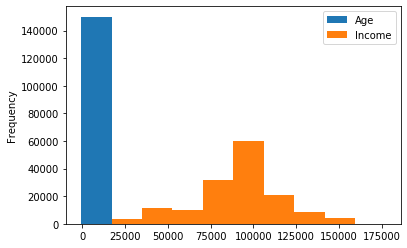

In [114]:
# calling .plot(kind='hist') on multiple elements - all histograms share axes

popDF[['Age','Income']].plot(kind='hist')

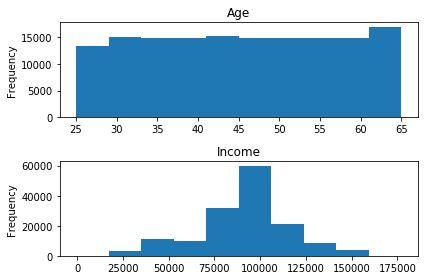

In [115]:
# manually constructing subplots with Matplotlib and assigning Pandas .plot objects to specific axes

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1)
popDF['Age'].plot(kind='hist', ax=axes[0])
popDF['Income'].plot(kind='hist',ax=axes[1])
axes[0].set_title('Age')
axes[1].set_title('Income')
plt.tight_layout()


With either method, there are also many options for configuring the histogram, such as defining the number of bins... 

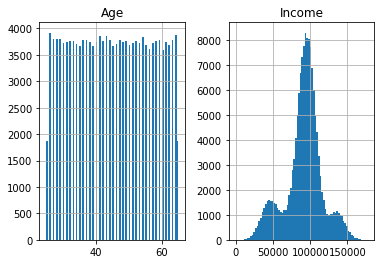

In [116]:
histogram = popDF[['Age','Income']].hist(bins=80)

There are also many other types of data visualisation that can be achieved using the same basic syntax. The 'kind' kwarg is used to instruct Pandas to create a certain type of pot from a long list of options including line, bar, box, density, area, pie, scatter and more. If 'kind' is not defined in the call to df.plot(), Pandas defaults to a line plot.

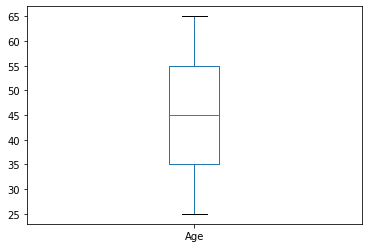

In [117]:
# plot popDF['Age'] as a box plot

boxplot = popDF['Age'].plot(kind='box')

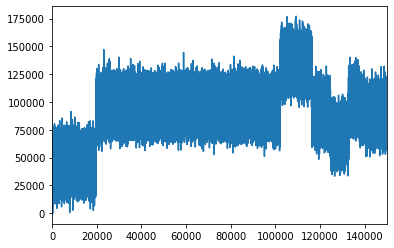

In [118]:
# plot popDF['Income'] as a line plot

lineplot = popDF['Income'].plot()

# this is equivalent to:
# lineplot = popDF['Income'].plot(kind='line')

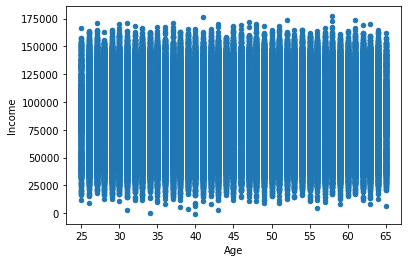

In [119]:
# scatter plot showing Age against Income

popDF.plot(kind='scatter',x='Age',y='Income')

We can also always combine plot types into a matplotlib subplots object...

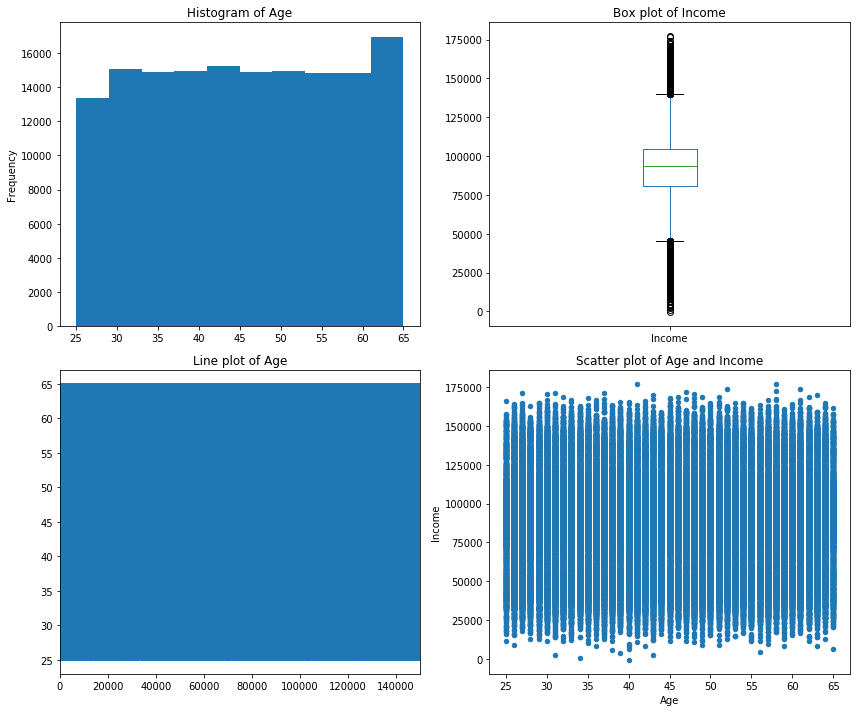

In [120]:
# add a box plot, line plot, scatter plot and histogram to a multipanel figure
fig, axes = plt.subplots(figsize=(12,10),nrows=2, ncols=2)

popDF['Age'].plot(kind='hist', ax=axes[0,0])
popDF['Income'].plot(kind='box',ax=axes[0,1])
popDF['Age'].plot(kind='line',ax=axes[1,0])
popDF.plot(kind='scatter',x='Age',y='Income',ax=axes[1,1])

axes[0,0].set_title('Histogram of Age')
axes[0,1].set_title('Box plot of Income')
axes[1,0].set_title('Line plot of Age')
axes[1,1].set_title('Scatter plot of Age and Income')

plt.tight_layout()

## 5 Further Reading

This just scratched the surface of data analysis with pandas, there is lots more information out there that can take you much deeper into the Pandas package. I have not covered groupby functions, data transformations, sorting or filtering, and have only lightly touched on data i/o. I may well do some more notebooks covering those topics and others later, but for now here are some suggestions for further reading:

https://pandas.pydata.org/docs/index.html
https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673
https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html
https://towardsdatascience.com/learn-advanced-features-for-pythons-main-data-analysis-library-in-20-minutes-d0eedd90d086
